### Packages and Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

### Global Constants

In [ ]:
PIC_PATH = ...
EXPERIMENT_DATA_PATH = ...
PARTICIPANT_DATA_PATH = ...

ASPECT_RATIO = 2

LABEL_FONTSIZE = 16
LEGEND_FONTSIZE = 15
TICK_FONTSIZE = 14

MY_PALETTE = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
MY_PALETTE_5 = [MY_PALETTE[1], MY_PALETTE[3], MY_PALETTE[5], MY_PALETTE[7], MY_PALETTE[9],]
MY_PALETTE_3 = [MY_PALETTE[2], MY_PALETTE[8], MY_PALETTE[0],]
MY_PALETTE_2 = [MY_PALETTE[4], MY_PALETTE[6],]
MY_PALETTE_4 = ['#98f5dc', '#d9a4dd', '#fc6739', '#99ec50']
OUR_PALETTE = ['#9F70D6', '#70A9FC', '#AB00C1', '#064997', '#54007B']
OUR_PALETTE_2 = ['#264653', '#287271', '#2a9d8f', '#8ab17d', '#e9c46a', '#f4a261', '#e76f51']
OUR_PALETTE_2_rev = ['#264653', '#287271', '#2a9d8f', '#8ab17d', '#e9c46a', '#f4a261', '#e76f51']
OUR_PALETTE_2_rev.reverse()

## Loading & preparing data

In [34]:
info = pd.read_csv(PARTICIPANT_DATA_PATH)
info.head(5)

,subject_id,Date of session 1,Date of session 2,Sessions gap,Education level,Age,Weight,Height,Waist measurement,Gender,...,Body mass index,Body fat percentage,Subcutaneous fat percentage,Visceral fat index,Muscle mass percentage,Basal Metabolic Rate,Bone mass,Body water percentage,Metabolic age,Body protein percentage
0,1,"2024-11-19, 15:56","2024-11-26, 17:56",7,M.Sc.,25,97.0,187,96.0,m,...,27.0,28.0,25.1,10.0,31.6,2326.0,3.8,49.2,32.0,15.4
1,2,"2024-11-25, 11:41","2024-12-29, 11:36",34,B.Sc.,22,60.0,163,77.0,f,...,22.4,26.7,24.3,5.0,55.0,1405.0,2.4,50.5,18.0,16.0
2,3,"2024-11-30, 18:07","2024-12-28, 18:40",28,M.Sc.,22,68.2,175,71.0,f,...,22.2,26.4,24.3,5.0,48.8,1610.0,2.9,51.5,19.0,16.1
3,4,"2024-11-30, 13:31","2025-01-01, 16:42",32,M.Sc.,22,52.0,152,71.0,f,...,22.7,27.2,24.5,5.0,60.4,1238.0,2.0,48.4,18.0,15.7
4,5,"2024-12-29, 18:02","2025-01-07, 16:32",9,M.Sc.,25,51.7,158,70.0,f,...,20.7,19.0,17.4,3.0,66.1,1241.0,2.1,56.4,18.0,16.3


In [35]:
df = pd.read_csv(EXPERIMENT_DATA_PATH)
df.head(5)

,Subject ID,Session,Trial,Raw magnitude,Raw angle,Raw x,Raw y,Confidence,Decision time,Trial time,Vib_1,Vib_2,Vib_3,Vib_4,Vib_5,Corrected magnitude,Corrected angle,Corrected x,Corrected y
0,1,1,0,0.356327,140.747257,-0.275926,0.225463,Medium,6.747346,10.942489,0,low,low,0,0,0.356327,140.747257,-0.275926,0.225463
1,1,1,1,0.273514,136.989114,-0.200000,0.186574,High,3.985147,7.719582,0,low,0,0,0,0.273514,136.989114,-0.200000,0.186574
2,1,1,2,0.783773,67.054713,0.305556,0.721759,High,1.886408,4.370242,0,0,high,medium,0,0.783773,67.054713,0.305556,0.721759
3,1,1,3,0.900653,35.691744,0.731481,0.525463,High,2.307706,4.842170,0,0,0,high,low,0.900653,35.691744,0.731481,0.525463
4,1,1,4,0.850490,101.683050,-0.172222,0.832870,High,1.670959,5.878375,0,low,high,0,0,0.850490,101.683050,-0.172222,0.832870


In [36]:
df['Delay time'] = df['Trial time'] - df['Decision time']

log_delay_time = np.log(df['Delay time'])
df['normalized_log_delay_time'] = (log_delay_time-log_delay_time.mean())/log_delay_time.std()

log_selection_time = np.log(df['Decision time'])
df['normalized_log_selection_time'] = (log_selection_time-log_selection_time.mean())/log_selection_time.std()

log_trial_time = np.log(df['Trial time'])
df['normalized_log_trial_time'] = (log_trial_time-log_trial_time.mean())/log_trial_time.std()

In [37]:
confidence_map = {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['Confidence level'] = df['Confidence'].map(confidence_map)

vib_map = {
    'low': 85,
    'medium': 170,
    'high': 255,
    '0': 0,
    0: 0  
}
cols = ['Vib_1', 'Vib_2', 'Vib_3', 'Vib_4', 'Vib_5']
df[cols] = df[cols].applymap(lambda x: vib_map.get(x, x))

df.head(5)

C:\Users\SAMAR\AppData\Local\Temp\ipykernel_1568\535881946.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: vib_map.get(x, x))


,Subject ID,Session,Trial,Raw magnitude,Raw angle,Raw x,Raw y,Confidence,Decision time,Trial time,...,Vib_5,Corrected magnitude,Corrected angle,Corrected x,Corrected y,Delay time,normalized_log_delay_time,normalized_log_selection_time,normalized_log_trial_time,Confidence level
0,1,1,0,0.356327,140.747257,-0.275926,0.225463,Medium,6.747346,10.942489,...,0,0.356327,140.747257,-0.275926,0.225463,4.195143,1.930153,1.078194,1.398529,2
1,1,1,1,0.273514,136.989114,-0.200000,0.186574,High,3.985147,7.719582,...,0,0.273514,136.989114,-0.200000,0.186574,3.734435,1.642092,0.266970,0.676237,3
2,1,1,2,0.783773,67.054713,0.305556,0.721759,High,1.886408,4.370242,...,0,0.783773,67.054713,0.305556,0.721759,2.483834,0.632309,-0.885219,-0.501608,3
3,1,1,3,0.900653,35.691744,0.731481,0.525463,High,2.307706,4.842170,...,85,0.900653,35.691744,0.731481,0.525463,2.534463,0.682276,-0.574673,-0.289317,3
4,1,1,4,0.850490,101.683050,-0.172222,0.832870,High,1.670959,5.878375,...,0,0.850490,101.683050,-0.172222,0.832870,4.207415,1.937386,-1.072054,0.112139,3


In [38]:
df['Pattern'] = df[['Vib_1', 'Vib_2', 'Vib_3', 'Vib_4', 'Vib_5']].apply(lambda row: row.to_numpy(), axis=1)

defined_patterns = np.unique(np.column_stack([df.Vib_1, df.Vib_2, df.Vib_3, df.Vib_4, df.Vib_5]), axis=0)
defined_pattern_cart_coors = []
defined_pattern_polar_coors = []
for pattern in defined_patterns :
    defined_pattern_cart_coors.append((pattern[0] * np.array([-1, 0]) + pattern[1] * np.sqrt(2)/2 * np.array([-1, 1]) + pattern[2] * np.array([0, 1]) \
        + pattern[3] * np.sqrt(2)/2 * np.array([1, 1]) + pattern[4] * np.array([1, 0]))/(255*5))
    defined_pattern_polar_coors
defined_pattern_cart_coors = np.array(defined_pattern_cart_coors)

manual_sequence = [
    [0, 0, 0, 0, 85],
    [0, 0, 0, 0, 170],
    [0, 0, 0, 0, 255],
    [0, 0, 0, 85, 85],
    [0, 0, 0, 85, 170],
    [0, 0, 0, 85, 255],
    [0, 0, 0, 170, 85],
    [0, 0, 0, 170, 170],
    [0, 0, 0, 170, 255],
    [0, 0, 0, 255, 85],
    [0, 0, 0, 255, 170],
    [0, 0, 0, 255, 255],
    [0, 0, 0, 85, 0],
    [0, 0, 0, 170, 0],
    [0, 0, 0, 255, 0],
    [0, 0, 85, 85, 0],
    [0, 0, 85, 170, 0],
    [0, 0, 85, 255, 0],
    [0, 0, 170, 85, 0],
    [0, 0, 170, 170, 0],
    [0, 0, 170, 255, 0],
    [0, 0, 255, 85, 0],
    [0, 0, 255, 170, 0],
    [0, 0, 255, 255, 0],
    [0, 0, 85, 0, 0],
    [0, 0, 170, 0, 0],
    [0, 0, 255, 0, 0],
    [0, 255, 255, 0, 0],
    [0, 170, 255, 0, 0],
    [0, 85, 255, 0, 0],
    [0, 255, 170, 0, 0],
    [0, 170, 170, 0, 0],
    [0, 85, 170, 0, 0],
    [0, 255, 85, 0, 0],
    [0, 170, 85, 0, 0],
    [0, 85, 85, 0, 0],
    [0, 255, 0, 0, 0],
    [0, 170, 0, 0, 0],
    [0, 85, 0, 0, 0],
    [255, 255, 0, 0, 0],
    [170, 255, 0, 0, 0],
    [85, 255, 0, 0, 0],
    [255, 170, 0, 0, 0],
    [170, 170, 0, 0, 0],
    [85, 170, 0, 0, 0],
    [255, 85, 0, 0, 0],
    [170, 85, 0, 0, 0],
    [85, 85, 0, 0, 0],
    [255, 0, 0, 0, 0],
    [170, 0, 0, 0, 0],
    [85, 0, 0, 0, 0],
]

pattern_indices = {}
for index, pattern in enumerate(manual_sequence):
    pattern_indices[tuple(pattern)] = index + 1
df['Pattern index'] = df['Pattern'].apply(lambda pattern: pattern_indices[tuple(pattern)])

defined_patterns_name = []
for pattern in defined_patterns :
    vibration_name = ''
    for vibration in pattern :
        if vibration == 0 :
            vibration_name += '0, '
        elif vibration == 85 :
            vibration_name += 'L, '
        elif vibration == 170 :
            vibration_name += 'M, '
        elif vibration == 255 :
            vibration_name += 'H, '
    defined_patterns_name.append(f"[{vibration_name[:-2]}]")
defined_patterns_name = np.array(defined_patterns_name)

def count_non_zero(pattern):
    return sum(1 for x in pattern if x != 0)

df['Vib num'] = df['Pattern'].apply(count_non_zero)

df.head(5)

,Subject ID,Session,Trial,Raw magnitude,Raw angle,Raw x,Raw y,Confidence,Decision time,Trial time,...,Corrected x,Corrected y,Delay time,normalized_log_delay_time,normalized_log_selection_time,normalized_log_trial_time,Confidence level,Pattern,Pattern index,Vib num
0,1,1,0,0.356327,140.747257,-0.275926,0.225463,Medium,6.747346,10.942489,...,-0.275926,0.225463,4.195143,1.930153,1.078194,1.398529,2,"[0, 85, 85, 0, 0]",36,2
1,1,1,1,0.273514,136.989114,-0.200000,0.186574,High,3.985147,7.719582,...,-0.200000,0.186574,3.734435,1.642092,0.266970,0.676237,3,"[0, 85, 0, 0, 0]",39,1
2,1,1,2,0.783773,67.054713,0.305556,0.721759,High,1.886408,4.370242,...,0.305556,0.721759,2.483834,0.632309,-0.885219,-0.501608,3,"[0, 0, 255, 170, 0]",23,2
3,1,1,3,0.900653,35.691744,0.731481,0.525463,High,2.307706,4.842170,...,0.731481,0.525463,2.534463,0.682276,-0.574673,-0.289317,3,"[0, 0, 0, 255, 85]",10,2
4,1,1,4,0.850490,101.683050,-0.172222,0.832870,High,1.670959,5.878375,...,-0.172222,0.832870,4.207415,1.937386,-1.072054,0.112139,3,"[0, 85, 255, 0, 0]",30,2


## Plots

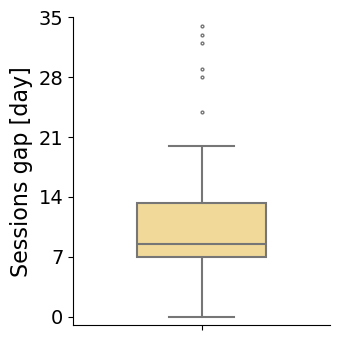

In [39]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from matplotlib import ticker

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))

def y_fmt(x, pos):
    return f'{x/1000:g}'

sb.boxplot(
    data=info,
    y='Sessions gap',
    ax=ax,
    width=0.5,
    color=MY_PALETTE_2[0],  
    fliersize=2,
    linewidth=1.5
)

ax.set_ylabel('Sessions gap [day]', fontsize=LABEL_FONTSIZE)
ax.set_xlabel('', fontsize=LABEL_FONTSIZE)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
y_min, y_max = 0, 34
ax.set_ylim([y_min - 1, y_max + 1])
y_ticks = np.linspace(y_min, 35, 6)
ax.set_yticks(y_ticks)

plt.tight_layout()
plt.savefig(PIC_PATH + "boxplot_gap.pdf",
            format="pdf", dpi=1200, bbox_inches="tight")
plt.show()


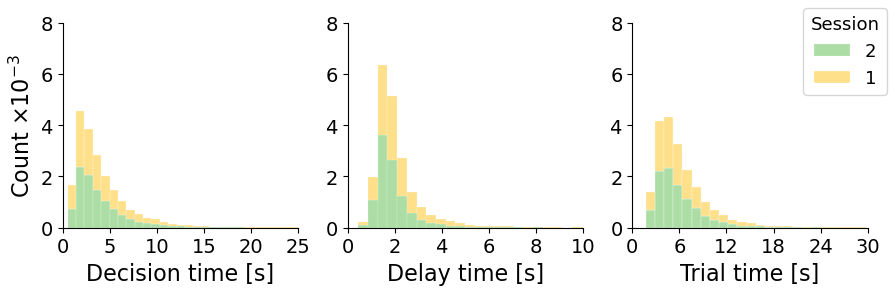

In [ ]:
row_num = 1
column_num = 3
fig_size = 3
fig, ax = plt.subplots(row_num, column_num, figsize=(column_num * fig_size , row_num * fig_size))
ax = ax.flatten()

lims = [[0, 25], [0, 10], [0, 30], [-3, 5], [-3, 5], [-3, 5]]
min_range = np.inf
for range in lims :
    if (range[1] - range[0]) < min_range :
        min_range = range[1] - range[0]
    

def y_fmt(x, pos):
    return f'{x/1000:g}'

def set_axis_limits(ax, x_min, x_max, x_num, y_min, y_max, y_num):
    ax.set_xlim(left=x_min, right=x_max)
    x_ticks = np.linspace(x_min, x_max, x_num)
    ax.set_xticks(x_ticks)
    ax.set_xticks([x_min, x_max], minor=True)
    
    ax.set_ylim(bottom=y_min, top=y_max)
    y_ticks = np.linspace(y_min, y_max, y_num)
    ax.set_yticks(y_ticks)
    ax.set_yticks([y_min, y_max], minor=True)

sb.histplot(data=df, x='Decision time', hue='Session', bins=80, edgecolor='white', ax=ax[0], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[0].set_xlabel('Decision time [s]', fontsize=LABEL_FONTSIZE)
ax[0].set_ylabel('Count $×10^{-3}$', fontsize=LABEL_FONTSIZE)
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[0].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
set_axis_limits(ax[0], lims[0][0], lims[0][1], 5+1, 0, 8000, 5)

sb.histplot(data=df, x='Delay time', hue='Session', bins=100, edgecolor='white', ax=ax[1], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[1].set_xlabel('Delay time [s]', fontsize=LABEL_FONTSIZE)
ax[1].set_ylabel('', fontsize=LABEL_FONTSIZE)
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[1].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
set_axis_limits(ax[1], lims[1][0], lims[1][1], 5+1, 0, 8000, 5)

sb.histplot(data=df, x='Trial time', hue='Session', bins=65, edgecolor='white', ax=ax[2], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[2].set_xlabel('Trial time [s]', fontsize=LABEL_FONTSIZE)
ax[2].set_ylabel('', fontsize=LABEL_FONTSIZE)
ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[2].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
set_axis_limits(ax[2], lims[2][0], lims[2][1], 5+1, 0, 8000, 5)

fig.legend(('2', '1'), loc='upper right', ncol=1, title='Session', title_fontsize = LABEL_FONTSIZE-3, fontsize= LABEL_FONTSIZE-3)

plt.tight_layout()
plt.savefig(PIC_PATH + "hist_time_session.pdf", format="pdf", dpi=1200, bbox_inches="tight")
plt.show()

C:\Users\SAMAR\AppData\Local\Temp\ipykernel_1568\3379339263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df, x='Pattern index', y='normalized_log_trial_time',


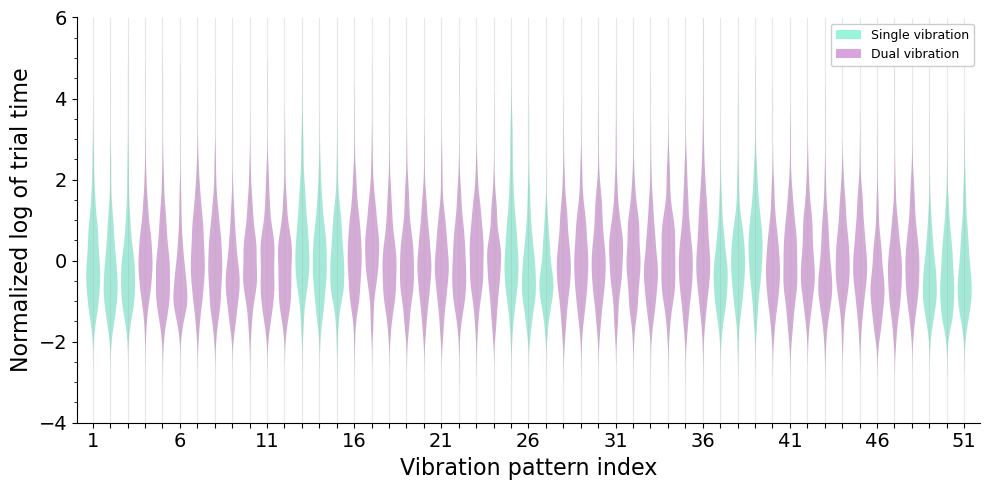

In [42]:
row_num = 1
column_num = 1
fig_size = 5
aspect_ratio = 2
fig, ax = plt.subplots(row_num, column_num, figsize=(column_num * fig_size * aspect_ratio, row_num * fig_size))

colors = [MY_PALETTE_4[1] if count_non_zero(manual_sequence[idx]) == 2 else MY_PALETTE_4[0] 
          for idx in np.arange(51)]
sb.violinplot(data=df, x='Pattern index', y='normalized_log_trial_time', 
             palette=colors, ax=ax, fill=True, inner=None, alpha=1, linewidth=0.01)


pattern_labels = [f"{idx}" if (idx%5==1) else "" for idx in np.arange(1,51+1)]
ax.set_xticks(np.arange(len(pattern_labels)))
ax.set_xticklabels(pattern_labels)
ax.set_xlabel('Vibration pattern index', fontsize=LABEL_FONTSIZE)

ax.set_ylabel('Normalized log of trial time', fontsize=LABEL_FONTSIZE)
ax.set_ylim(-4, 6)
ax.set_yticks(np.arange(-4, 6+1, 2)) 
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_elements = [
    Patch(facecolor=MY_PALETTE_4[0], label='Single vibration'),
    Patch(facecolor=MY_PALETTE_4[1], label='Dual vibration')
]
ax.legend(handles=legend_elements, fontsize=LABEL_FONTSIZE-7, framealpha=1)

plt.grid(axis='x', alpha=0.3)
plt.margins(x=0.01)
plt.tight_layout()
plt.savefig(PIC_PATH + "violin_time_pattern.pdf", format="pdf", dpi=600, bbox_inches="tight")
plt.show()

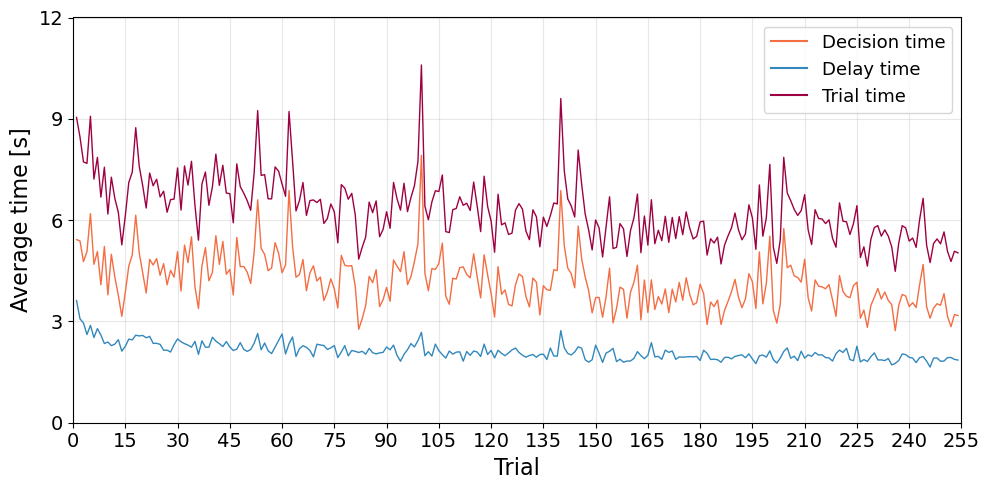

In [ ]:
row_num = 1
column_num = 1
fig_size = 5
aspect_ratio = 2
fig, ax = plt.subplots(row_num, column_num, figsize=(column_num * fig_size * aspect_ratio , row_num * fig_size))

not_first_trial_df = df[df['Trial'] != 0]

Average_selection_time = not_first_trial_df.groupby('Trial')['Decision time'].mean()
Average_trial_time = not_first_trial_df.groupby('Trial')['Trial time'].mean()
Average_delay_time = not_first_trial_df.groupby('Trial')['Delay time'].mean()
Average_confidence_level = not_first_trial_df.groupby('Trial')['Confidence level'].mean()

ax.plot(Average_selection_time.index, Average_selection_time.values, 
         linestyle='-', color=MY_PALETTE_3[0], label='Selection Time', linewidth=1)
ax.plot(Average_delay_time.index, Average_delay_time.values, 
         linestyle='-', color=MY_PALETTE_3[1], label='Delay Time', linewidth=1)
ax.plot(Average_trial_time.index, Average_trial_time.values, 
         linestyle='-', color=MY_PALETTE_3[2], label='Trial Time', linewidth=1)

ax.set_xlim(left=0, right=255)
x_ticks = np.linspace(0, 255, 17+1)
ax.set_xticks(x_ticks)
ax.set_xticks([0, 255], minor=True)

ax.set_ylim(bottom=0, top=12)
y_ticks = np.linspace(0, 12, 5)
ax.set_yticks(y_ticks)
ax.set_yticks([0, 12], minor=True)

ax.set_xlabel('Trial', fontsize=LABEL_FONTSIZE)
ax.set_ylabel('Average time [s]', fontsize=LABEL_FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.tick_params(axis='x')
ax.grid(True, alpha=0.3)
ax.margins(x=0.01) 

legend_elements = [
    Line2D([0], [0], color=MY_PALETTE_3[0], linestyle='-', label='Decision time'),
    Line2D([0], [0], color=MY_PALETTE_3[1], linestyle='-', label='Delay time'),
    Line2D([0], [0], color=MY_PALETTE_3[2], linestyle='-', label='Trial time'),
]
ax.legend(handles=legend_elements, fontsize=LABEL_FONTSIZE-3)

plt.tight_layout()
plt.savefig(PIC_PATH + "plot_time_trial.pdf", format="pdf", dpi=1200, bbox_inches="tight")
plt.show()


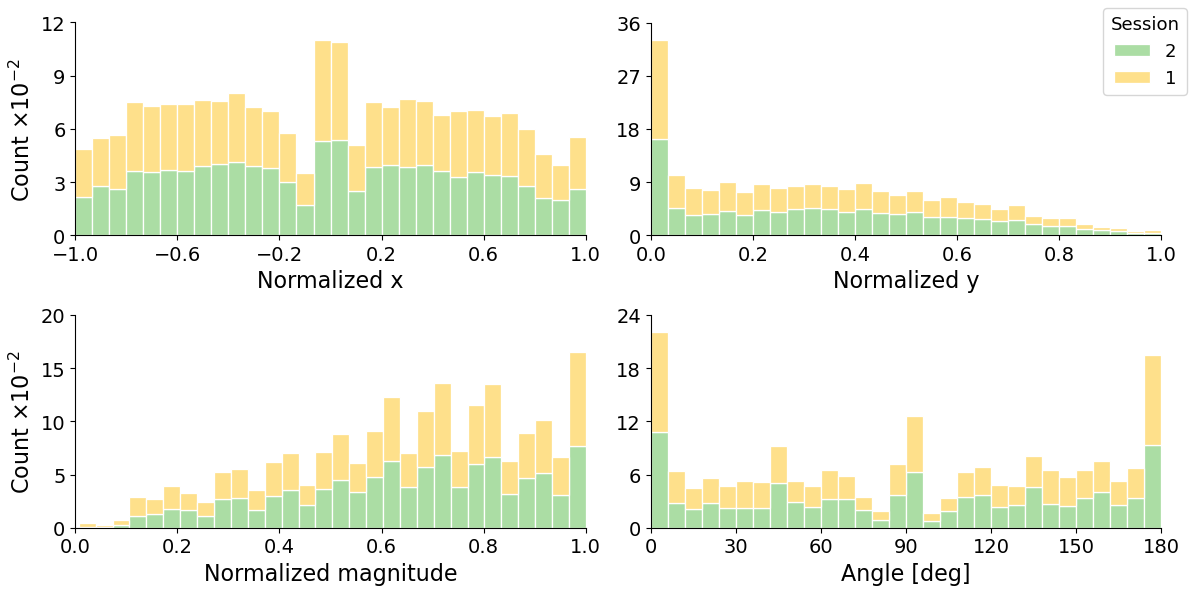

In [54]:
row_num = 2
column_num = 2
fig_size = 3
aspect_ratio = 2
fig, ax = plt.subplots(row_num, column_num, figsize=(column_num * fig_size * aspect_ratio , row_num * fig_size))
ax = ax.flatten()

def y_fmt(x, pos):
    return f'{x/100:g}'

def set_axis_limits(ax, x_min, x_max, x_num, y_min, y_max, y_num):
    ax.set_xlim(left=x_min, right=x_max)
    x_ticks = np.linspace(x_min, x_max, x_num)
    ax.set_xticks(x_ticks)
    ax.set_xticks([x_min, x_max], minor=True)
    
    ax.set_ylim(bottom=y_min, top=y_max)
    y_ticks = np.linspace(y_min, y_max, y_num)
    ax.set_yticks(y_ticks)
    ax.set_yticks([y_min, y_max], minor=True)

sb.histplot(data=df, x='Corrected x', hue='Session', bins=30, edgecolor='white', ax=ax[0], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[0].set_xlabel('Normalized x', fontsize=LABEL_FONTSIZE)
ax[0].set_ylabel('Count $×10^{-2}$', fontsize=LABEL_FONTSIZE)
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[0].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
set_axis_limits(ax[0], -1, 1, 5+1, 0, 1200, 5)

sb.histplot(data=df, x='Corrected y', hue='Session', bins=30, edgecolor='white', ax=ax[1], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[1].set_xlabel('Normalized y', fontsize=LABEL_FONTSIZE)
ax[1].set_ylabel('', fontsize=LABEL_FONTSIZE)
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[1].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
set_axis_limits(ax[1], 0, 1, 5+1, 0, 3600, 5)

sb.histplot(data=df, x='Corrected magnitude', hue='Session', bins=30, edgecolor='white', ax=ax[2], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[2].set_xlabel('Normalized magnitude', fontsize=LABEL_FONTSIZE)
ax[2].set_ylabel('Count $×10^{-2}$', fontsize=LABEL_FONTSIZE)
ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[2].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
set_axis_limits(ax[2], 0, 1, 5+1, 0, 2000, 5)

sb.histplot(data=df, x='Corrected angle', hue='Session', bins=30, edgecolor='white', ax=ax[3], multiple='stack',  
    palette=MY_PALETTE_2, alpha=1, legend=False)
ax[3].set_xlabel('Angle [deg]', fontsize=LABEL_FONTSIZE)
ax[3].set_ylabel('', fontsize=LABEL_FONTSIZE)
ax[3].yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
ax[3].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
set_axis_limits(ax[3], 0, 180, 6+1, 0, 2400, 5)
fig.legend(('2', '1'), loc='upper right', ncol=1, title='Session', title_fontsize = LABEL_FONTSIZE-3, fontsize= LABEL_FONTSIZE-3)

plt.tight_layout()
plt.savefig(PIC_PATH + "hist_coor_session.pdf", format="pdf", dpi=1200, bbox_inches="tight")
plt.show()

C:\Users\SAMAR\AppData\Local\Temp\ipykernel_1568\175939110.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df, x='Pattern index', y='Confidence level',


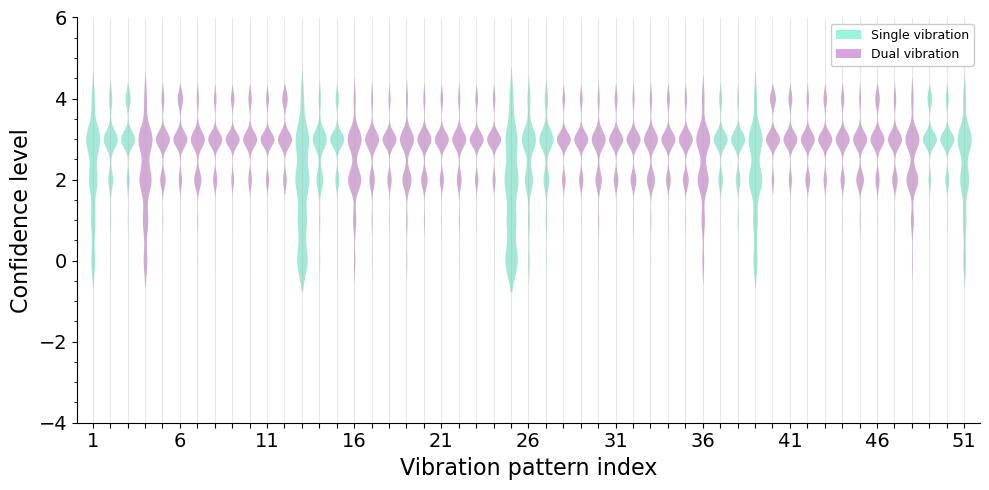

In [55]:
row_num = 1
column_num = 1
fig_size = 5
aspect_ratio = 2
fig, ax = plt.subplots(row_num, column_num, figsize=(column_num * fig_size * aspect_ratio, row_num * fig_size))

colors = [MY_PALETTE_4[1] if count_non_zero(manual_sequence[idx]) == 2 else MY_PALETTE_4[0] 
          for idx in np.arange(51)]
sb.violinplot(data=df, x='Pattern index', y='Confidence level', 
             palette=colors, ax=ax, fill=True, inner=None, alpha=1, linewidth=0.01)

pattern_labels = [f"{idx}" if (idx%5==1) else "" for idx in np.arange(1,51+1)]
ax.set_xticks(np.arange(len(pattern_labels)))
ax.set_xticklabels(pattern_labels)
ax.set_xlabel('Vibration pattern index', fontsize=LABEL_FONTSIZE)

ax.set_ylabel('Confidence level', fontsize=LABEL_FONTSIZE)
ax.set_ylim(-4, 6)
ax.set_yticks(np.arange(-4, 6+1, 2)) 
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_elements = [
    Patch(facecolor=MY_PALETTE_4[0], label='Single vibration'),
    Patch(facecolor=MY_PALETTE_4[1], label='Dual vibration'),
]
ax.legend(handles=legend_elements, fontsize=LABEL_FONTSIZE-7, framealpha=1)

plt.grid(axis='x', alpha=0.3)
plt.margins(x=0.01)
plt.tight_layout()
plt.savefig(PIC_PATH + "violin_confidence_pattern.pdf", format="pdf", dpi=1200, bbox_inches="tight")
plt.show()